## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='right')

# Display the data table for preview
print(merged_df.head(50))

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      b128    Capomulin  Female           9          22          0   
1      b128    Capomulin  Female           9          22          5   
2      b128    Capomulin  Female           9          22         10   
3      b128    Capomulin  Female           9          22         15   
4      b128    Capomulin  Female           9          22         20   
5      b128    Capomulin  Female           9          22         25   
6      b128    Capomulin  Female           9          22         30   
7      b128    Capomulin  Female           9          22         35   
8      b128    Capomulin  Female           9          22         40   
9      b128    Capomulin  Female           9          22         45   
10     f932     Ketapril    Male          15          29          0   
11     g107     Ketapril  Female           2          29          0   
12     g107     Ketapril  Female           2          29          5   
13    

In [67]:
# Checking the number of mice.
print(mouse_metadata['Mouse ID'].unique().shape)

# Finding duplicates in study_results
dup = merged_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)

print(dup)

(249,)
0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = merged_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)


            
            

In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
count = 0
for x in dup:
    if x == 1:
        print(count)
        print(x)
        print()
    count += 1

860
True

861
True

862
True

863
True

864
True

865
True

866
True

867
True

868
True

869
True



In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False,inplace=True)
merged_df.shape

(1883, 8)

In [71]:
# Checking the number of mice in the clean DataFrame.
merged_df['Mouse ID'].unique().shape


(249,)

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_std = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_analysis = pd.DataFrame({
    'Mean':tumor_mean,
    'Median':tumor_median,
    'Var':tumor_var,
    'STD':tumor_std,
    'SEM':tumor_sem
    
})
print(tumor_analysis)


                   Mean     Median        Var       STD       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


<AxesSubplot:xlabel='Drug Regimen'>

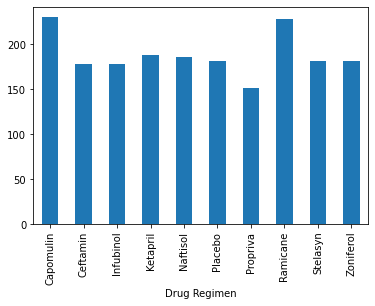

In [102]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
print(merged_df.groupby('Drug Regimen')['Mouse ID'].count())

merged_df.groupby('Drug Regimen')['Mouse ID'].count().plot(kind='bar')


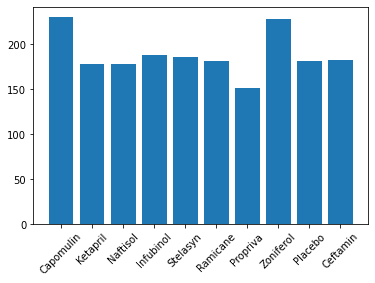

In [106]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(merged_df['Drug Regimen'].unique(), merged_df.groupby('Drug Regimen')['Mouse ID'].count())
plt.xticks(rotation = 45)
plt.show()

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

merged_df.columns

merged_df

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
